In [446]:
%matplotlib inline
from sklearn import linear_model
import statsmodels.formula.api as smf
from IPython.display import display
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

In [447]:
NY_Crime = pd.read_csv('NYM.csv')
NY_Crime.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,nan
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,nan


In [448]:
NY_Crime.columns = NY_Crime.iloc[3]
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,nan
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,nan


In [449]:
NY_Crime = NY_Crime.drop(NY_Crime.index[:4])

In [450]:
NY_Crime = NY_Crime.reset_index(drop=True)
NY_Crime.drop(labels=[348, 349, 350], axis=0, inplace=True)

In [451]:
NY_Crime.rename(columns = {"Murder and\nnonnegligent\nmanslaughter" : 'Murder'}, inplace=True)
NY_Crime.rename(columns = {"Property\ncrime" : 'Property_Crime'}, inplace=True)
NY_Crime.rename(columns = {"Violent\ncrime" : 'Violent_Crime'}, inplace=True)
NY_Crime.head()

3,City,Population,Violent_Crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,nan
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0,nan
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0,nan
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,nan
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,nan


In [452]:
NY_Crime['Murder'] = NY_Crime['Murder'].str.replace(",", "")
NY_Crime['Robbery'] = NY_Crime['Robbery'].str.replace(",", "")
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].str.replace(",", "")
NY_Crime['Violent_Crime'] = NY_Crime['Violent_Crime'].str.replace(",", "")
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].astype(int)
NY_Crime['Murder'] = NY_Crime['Murder'].astype(int)
NY_Crime['Robbery'] = NY_Crime['Robbery'].astype(int)
NY_Crime['Population'] = NY_Crime['Population'].str.replace(",", "")
NY_Crime['Population'] = NY_Crime.Population.astype(int)
NY_Crime['Violent_Crime'] = NY_Crime['Violent_Crime'].astype(int)

In [453]:
NY_Crime['Murder2'] = NY_Crime['Murder'].apply(lambda x: 1 if x > 0 else 0)
NY_Crime['Robbery2'] = NY_Crime['Robbery'].apply(lambda x: 1 if x > 0 else 0)
NY_Crime.head()

3,City,Population,Violent_Crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Murder2,Robbery2
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0,nan,0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0,nan,0,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0,nan,0,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,"3,243",142,NaN,nan,1,1
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,nan,0,1


In [454]:
NY_Crime['Population'] = NY_Crime['Population'].apply(lambda x: x if x < 10000 else 0)
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].apply(lambda x: x if x < 1000 else 0)
NY_Crime['Violent_Crime'] = NY_Crime['Violent_Crime'].apply(lambda x: x if x < 250 else 0)


In [455]:
NY_Crime['Population'] = NY_Crime['Population'].dropna(how='0')

In [456]:
NY_Crime = NY_Crime[['Property_Crime', 'Violent_Crime', 'Population', 'Robbery2']]
NY_Crime.head()

3,Property_Crime,Violent_Crime,Population,Robbery2
0,12,0,1861,0
1,24,3,2577,0
2,16,3,2846,0
3,0,0,0,1
4,223,23,6388,1


In [457]:
NY_Crimes = NY_Crime

In [458]:
NY_Crimes = pd.DataFrame()

In [459]:
NY_Crimes['Population'] = NY_Crime['Population']
NY_Crimes['Robbery2'] = NY_Crime['Robbery2']
NY_Crimes['Property_Crime'] = NY_Crime['Property_Crime']
NY_Crimes['Violent_Crime'] = NY_Crime['Violent_Crime']

In [460]:
NY_Crimes['Violent_Crime'].head()

0     0
1     3
2     3
3     0
4    23
Name: Violent_Crime, dtype: int64

In [461]:
NY_Crimes['Population'] = NY_Crimes[NY_Crimes['Population'] >= 1]

In [462]:
NY_Crimes.dropna(inplace=True)

In [463]:
NY_Crimes.head()

,Population,Robbery2,Property_Crime,Violent_Crime
0,1861.000,0,12,0
1,2577.000,0,24,3
2,2846.000,0,16,3
4,6388.000,1,223,23
5,4089.000,1,46,5


## Calculating the KNN Regression!

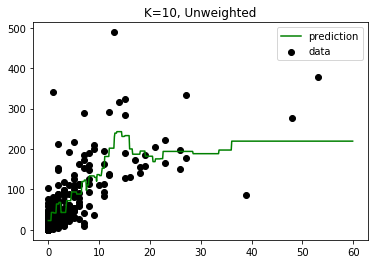

In [470]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(NY_Crimes.Violent_Crime)
Y = NY_Crimes.Property_Crime
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 60, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X.values, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

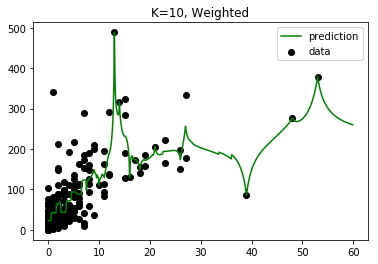

In [471]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(NY_Crimes.Violent_Crime)
Y = NY_Crimes.Property_Crime
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 60, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X.values, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [472]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.41 (+/- 0.31)
Weighted Accuracy: 0.36 (+/- 0.41)


## Calculating the OLS Regression!

In [473]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

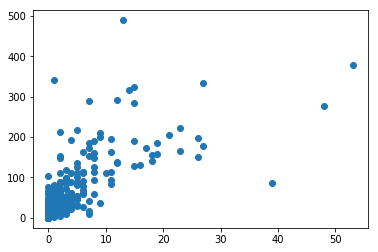

In [474]:
y = [NY_Crimes["Property_Crime"]]
x = [NY_Crimes["Violent_Crime"]]
plt.scatter(x,y)

Coefficients: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Intercept: 
 [ 12.  24.  16. 223.  46.  10. 210.  39.  33.   2.   5.  25.  88.  94.
 191.  14.   4.  24.  20.  31.  13.  11. 165.  47.  10.  15.  44.  46.
  60.  12.  93.   2.   8.  60.   4.  59.  58.  53.  32.  25.  65.  60.
 218.  86.  16.  22.  42. 113.  53.  81. 152. 152.  36.  14.   8.  41.
  99.  66. 125. 147.  31. 173. 288.  89.   1.  53.  44.  90.  50.  33.
  32.  16. 162.   9.   5.  64.  29.  26.  20.   1.  42. 213.  21.  38.
 161.  10.  81. 379.  39.  33.  38. 112. 110. 198. 112.  12. 128.  23.
 316.   2.  16. 103.  51.  32. 341.  87.  84. 206. 130.  46.  18.  58.
 179.  61. 192.  21.   0.  13. 135. 114. 139. 101.  19. 137. 114.  45.
 276.  15.   9.  32.  74. 334.   0.  64. 489.   8.  59. 111.   1. 325.
  54.  39.  10. 199.  13.  19.  73.  41. 147. 172. 111.  99.  19.  12.
  22.   0.  31. 284.   8. 190.  33

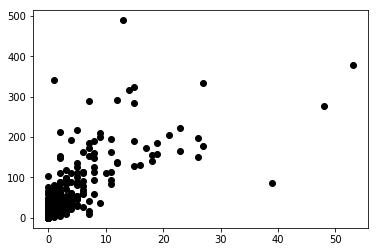

In [477]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

## We can see that the unweight is more accurate than the weighted one. Now if we compare the KNN Regression and OLS Regression, they are different. The "Best Fit Line" did not show up for OLS Regression. But if I were to exclude 0 in Violent Crime, then both KNN and OLS will show a linear Regression line. Thus, it can be similar if we remove some dataset. If not, then they do not look the same. 